In [1]:

library(MotifDb)
library(seqLogo)
library(motifStack)
library(Biostrings)
library(GenomicFeatures)
library(igraph)
library(stringr)

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading required package: Biostrings

Loading required package: XVector


A

In [2]:

library(TxDb.Mmusculus.UCSC.mm10.knownGene)
library(org.Mm.eg.db)
library(AnnotationDbi)
library(BSgenome.Mmusculus.UCSC.mm10)



Loading required package: BSgenome

Loading required package: rtracklayer


Attaching package: ‘rtracklayer’


The following object is masked from ‘package:igraph’:

    blocks




In [3]:
findHits <- function (TF.gene,pfm,per){
    
    pcm.nfix.jaspar = pfm


    
    seqLogo(pcm.nfix.jaspar)

    pwm.hits <- sapply(promoter.seqs, 
                          function(pseq) 
                             matchPWM(pcm.nfix.jaspar, unlist(pseq), min.score=per))

    nfix.jaspar.hits <- sapply(pwm.hits, length)
    head(nfix.jaspar.hits)
    nfix.jaspar.hits.positive <- nfix.jaspar.hits[nfix.jaspar.hits > 0]
    head(nfix.jaspar.hits.positive)
    length(nfix.jaspar.hits.positive)
    length(nfix.jaspar.hits)

    hit.genes =  as.data.frame( genes[ genes %in% names( nfix.jaspar.hits.positive)])
    hit.genes$gene = row.names(hit.genes)
    colnames(hit.genes) = c("ENTREZID","gene")

    nfix.jaspar.hits.dataframe = as.data.frame(nfix.jaspar.hits)
    nfix.jaspar.hits.dataframe$ENTREZID = row.names(nfix.jaspar.hits.dataframe)
    colnames(nfix.jaspar.hits.dataframe) = c("hits","ENTREZID")
    nfix.hits.genes <- merge(hit.genes,nfix.jaspar.hits.dataframe,by=c("ENTREZID"))

    nfix.hits.genes$TF <- TF.gene
    head(nfix.hits.genes)
    dim(nfix.hits.genes)
    return (nfix.hits.genes)

}

In [4]:
plotAllMotif<- function ( geneName  ) {

    #mat = query(MotifDb, geneName)
    print(geneName)
    pfm.TF = c()
    count = 0
    print(length (as.list (mat)))
    if(length (as.list (mat)) > 1 ){
        for (key in c(1: length (as.list (mat)) )) {
            count = count + 1
            pfm  <- new("pfm", mat=mat[[key]], 
                                name=paste( names(as.list (mat)[key]),"--",count ))

            pfm.TF = c(pfm.TF,pfm)
        }

        plotMotifLogoStack(DNAmotifAlignment( pfm.TF   ))
    }else{
        if(length (as.list (mat)) == 1 ){
            print(geneName)
            pfm <- mat[[1]]
            seqLogo(pfm)
        }
        
    }
    
}
  

In [5]:
load("data/deg_clusteP1_vs_P5_cut.Rdata")

In [6]:
head(clusterP5.DEG_CUT)
dim(clusterP5.DEG_CUT)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,dir,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
H19,1.265503e-233,-0.6515780,0.593,0.936,3.106683e-229,P5,down,H19
Dlk1,2.016952e-149,-0.4980116,0.766,0.944,4.951416e-145,P5,down,Dlk1
Cox7a2l,2.765188e-133,-0.2808167,0.875,0.967,6.788260e-129,P5,down,Cox7a2l
Meg3,9.836509e-132,-0.3025115,0.975,0.996,2.414765e-127,P5,down,Meg3
Hbb-bt,1.177453e-125,-0.3450935,0.719,0.902,2.890529e-121,P5,down,Hbb-bt
Gas1,8.630197e-123,-0.3780728,0.695,0.906,2.118627e-118,P5,down,Gas1


[1] 41  8

In [7]:
cluste2_3.DEG <- clusterP5.DEG_CUT
genesS <- cluste2_3.DEG$gene
head(genesS)
genes <- mapIds(org.Mm.eg.db, genesS, 'ENTREZID', 'SYMBOL')
genes <- genes[!is.na(genes)]
genes <- genes[genes %in% keys(TxDb.Mmusculus.UCSC.mm10.knownGene)]
head(genes)

grl <- transcriptsBy(TxDb.Mmusculus.UCSC.mm10.knownGene, by="gene") [genes]
promoter.seqs <- getPromoterSeq(grl, Mmusculus, upstream=2500,
                                downstream=500)
head(promoter.seqs)

[1] "H19"     "Dlk1"    "Cox7a2l" "Meg3"    "Hbb-bt"  "Gas1"

'select()' returned 1:1 mapping between keys and columns



H19        Dlk1     Cox7a2l        Meg3      Hbb-bt        Gas1 
    "14955"     "13386"     "20463"     "17263" "101488143"     "14451"

DNAStringSetList of length 6
[["14955"]] 14955=GAATGGTTCCCTTACACACTGAACCAGAGAACTTGACTCATTCCCTACACAGCCCGAGA...
[["13386"]] 13386=GCCACCCTGTAGGGCCTCCAAAAGAGGATTCTGTCTGCTTCCCTCACAGATCCCTCGAG...
[["20463"]] 20463=ACACCTCCTAATAGTGCCCCTCTCTAGCCCAAGCATAGACACACTGTCACACAAGTTAA...
[["17263"]] 17263=CTTATTTTTGCCTTTATTTTAGGAAGCCAGAAGGACAAACATGTTGCCATGGAGTTCTG...
[["101488143"]] 101488143=TAGTGATTGCCATATCCAGGGATCCACCCCATAATCAGCATCCAAACGCTG...
[["14451"]] 14451=TGAAAGAGGGGAATGCACACAGCCTGCTGTGGCTGCCTGTTCCTCTGGCCTTCCACGTC...

<h1>Transcription factors</h1>

In [8]:
allTF = values (MotifDb)$geneSymbol
cluste2_3.DEG.TF = cluste2_3.DEG[toupper(cluste2_3.DEG$gene) %in% toupper(allTF), ]
cluste2_3.DEG.TF.up = cluste2_3.DEG.TF[cluste2_3.DEG.TF$avg_log2FC > 0, ]
cluste2_3.DEG.TF.down = cluste2_3.DEG.TF[cluste2_3.DEG.TF$avg_log2FC <0, ]

In [9]:
#save TF as csv
write.csv(cluste2_3.DEG.TF.up,"data/TF/mergeP1-P5-TF-up.csv", row.names = FALSE)
write.csv(cluste2_3.DEG.TF.down,"data/TF/mergeP1-TF-down.csv", row.names = FALSE)

In [10]:
#save DEG as csv
cluste2_3.DEG$TF <- ifelse(toupper(cluste2_3.DEG$gene) %in% toupper(allTF),"yes","no")
cluste2_3.DEG.up = cluste2_3.DEG[cluste2_3.DEG$avg_log2FC > 0, ]
cluste2_3.DEG.down = cluste2_3.DEG[cluste2_3.DEG$avg_log2FC < 0, ]
write.csv(cluste2_3.DEG.up,"data/TF/mergeP1-P5-up.csv", row.names = FALSE)
write.csv(cluste2_3.DEG.down,"data/TF/mergeP1-P5-down.csv", row.names = FALSE)

In [11]:
dim(cluste2_3.DEG.up)
dim(cluste2_3.DEG.down)

[1] 10  9

[1] 31  9

In [12]:
cluste2_3.DEG.TF = cluste2_3.DEG[toupper(cluste2_3.DEG$gene) %in% toupper(allTF), ]
cluste2_3.DEG.TF = cluste2_3.DEG.TF[cluste2_3.DEG.TF$avg_log2FC > 0, ]
cluste2_3.DEG.TF
dim(cluste2_3.DEG.TF)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,dir,gene,TF
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
Foxl2,7.867274e-61,0.2804115,0.539,0.263,1.931337e-56,P5,up,Foxl2,yes


[1] 1 9

[1] "Foxl2"
[1] 1
[1] "Foxl2"


MotifDb object of length 1
| Created from downloaded public sources, last update: 2022-Mar-04
| 1 position frequency matrices from 1 source:
|         jaspar2022:    1
| 1 organism/s
|          Mmusculus:    1
Mmusculus-jaspar2022-Foxl2-MA1607.1 

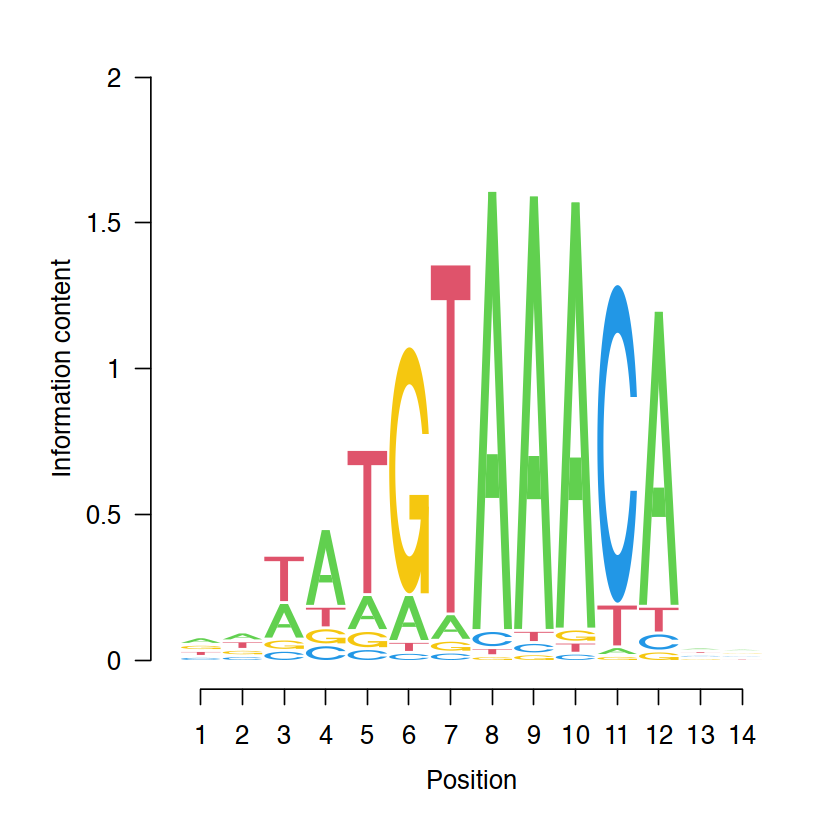

In [13]:
TF.gene = cluste2_3.DEG.TF$gene[1]
mat = subset (MotifDb, organism=='Mmusculus' & 
                        dataSource=='jaspar2022' & 
                        geneSymbol==TF.gene)
plotAllMotif(TF.gene)
mat

[1] 24  5

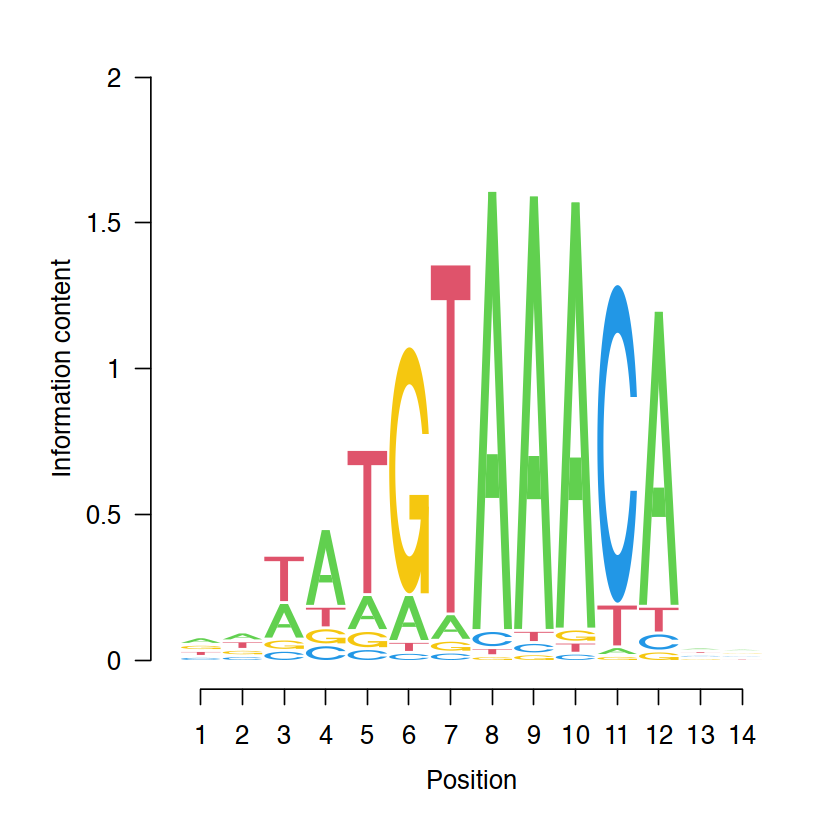

In [14]:
hits.tf <- findHits (TF.gene,pfm = mat[[1]],"85%" )
hits.tf$source = "jaspar2022"
#### dataframe with TF hits 
dim(hits.tf)
TF.hits <- hits.tf


In [15]:
TF.hits

ENTREZID,gene,hits,TF,source
<chr>,<chr>,<int>,<chr>,<chr>
103172,Chchd10,1,Foxl2,jaspar2022
11475,Acta2,1,Foxl2,jaspar2022
11658,Alcam,3,Foxl2,jaspar2022
12577,Cdkn1c,1,Foxl2,jaspar2022
12628,Cfh,1,Foxl2,jaspar2022
12829,Col4a4,2,Foxl2,jaspar2022
13717,Eln,3,Foxl2,jaspar2022
14114,Fbln1,1,Foxl2,jaspar2022
14456,Gas6,1,Foxl2,jaspar2022


In [16]:
length(promoter.seqs)

[1] 39

In [17]:
TF.hits$TF <- str_to_title (TF.hits$TF)

In [18]:
head(TF.hits)

,ENTREZID,gene,hits,TF,source
,<chr>,<chr>,<int>,<chr>,<chr>
1,103172,Chchd10,1,Foxl2,jaspar2022
2,11475,Acta2,1,Foxl2,jaspar2022
3,11658,Alcam,3,Foxl2,jaspar2022
4,12577,Cdkn1c,1,Foxl2,jaspar2022
5,12628,Cfh,1,Foxl2,jaspar2022
6,12829,Col4a4,2,Foxl2,jaspar2022


In [19]:
hitsGeneCsv <- function(gene) {
    
    hits.tmp <- TF.hits[TF.hits$TF == gene,]
    DEG.tmp <- cluste2_3.DEG[ cluste2_3.DEG$gene %in% TF.hits$gene,]
    hits.tmp <- merge(hits.tmp,DEG.tmp,by = "gene")
    write.csv(hits.tmp,paste("data/TF/",gene,"Merge-P5-V1-hits.csv"), row.names = FALSE)
}

In [20]:
lapply( cluste2_3.DEG.TF$gene, hitsGeneCsv)

[[1]]
NULL

In [21]:
write.csv(TF.hits,"data/merge-P5vsP1-TF.hits.csv", row.names = FALSE)
save(TF.hits, file = "data/merge-P5vsP1-TF.hits.Rdata")

In [22]:
head(clusterP5.DEG_CUT)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,dir,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
H19,1.265503e-233,-0.6515780,0.593,0.936,3.106683e-229,P5,down,H19
Dlk1,2.016952e-149,-0.4980116,0.766,0.944,4.951416e-145,P5,down,Dlk1
Cox7a2l,2.765188e-133,-0.2808167,0.875,0.967,6.788260e-129,P5,down,Cox7a2l
Meg3,9.836509e-132,-0.3025115,0.975,0.996,2.414765e-127,P5,down,Meg3
Hbb-bt,1.177453e-125,-0.3450935,0.719,0.902,2.890529e-121,P5,down,Hbb-bt
Gas1,8.630197e-123,-0.3780728,0.695,0.906,2.118627e-118,P5,down,Gas1


In [23]:
TF.hits <- clusterP5.DEG_CUT[ toupper( clusterP5.DEG_CUT$gene) %in% toupper(TF.hits$gene),]
TF.hits.up <- TF.hits[TF.hits$dir == "up",]
TF.hits.down <- TF.hits[TF.hits$dir == "down",]

In [24]:
head(TF.hits.up)
head(TF.hits.down)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,dir,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Col4a4,1.020874e-97,0.3313315,0.477,0.146,2.506144e-93,P5,up,Col4a4
Lsp1,8.052254e-85,0.3238667,0.925,0.751,1.976748e-80,P5,up,Lsp1
Kcnk2,8.515339e-85,0.3323284,0.625,0.307,2.090431e-80,P5,up,Kcnk2
Cfh,6.493384e-83,0.3019830,0.742,0.480,1.594061e-78,P5,up,Cfh
Zbtb20,6.323274e-61,0.2549843,0.793,0.579,1.552301e-56,P5,up,Zbtb20
Chchd10,7.787840e-58,0.2840069,0.521,0.274,1.911837e-53,P5,up,Chchd10


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,dir,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Cox7a2l,2.765188e-133,-0.2808167,0.875,0.967,6.788260e-129,P5,down,Cox7a2l
Meg3,9.836509e-132,-0.3025115,0.975,0.996,2.414765e-127,P5,down,Meg3
Hba-a1,5.901884e-116,-0.2715348,0.918,0.980,1.448853e-111,P5,down,Hba-a1
Alcam,2.960251e-96,-0.4142805,0.225,0.548,7.267120e-92,P5,down,Alcam
Npc2,1.909844e-92,-0.2555322,0.757,0.918,4.688476e-88,P5,down,Npc2
Pdgfrl,9.736947e-76,-0.3418937,0.315,0.610,2.390323e-71,P5,down,Pdgfrl


<h1> Enrichment analysis </h1>

In [25]:
library(org.Mm.eg.db)
library(AnnotationDbi)
library("clusterProfiler")

clusterProfiler v4.6.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:igraph’:

    simplify


The following object is masked from ‘package:AnnotationDbi’:

    select


The following object is masked from ‘package:XVector’:

    slice


The following object is masked from ‘package:IRanges’:

    slice


The following object is masked from ‘package:S4Vectors’:

    rename


The following object is masked from ‘package:stats’:

    filter




In [26]:
TF.hits.up$gene

[1] "Col4a4"  "Lsp1"    "Kcnk2"   "Cfh"     "Zbtb20"  "Chchd10" "Gas6"

In [30]:
#BP MF CC
GO_results <- enrichGO(gene = TF.hits.up$gene, 
                       OrgDb = "org.Mm.eg.db", keyType = "SYMBOL", ont = "BP")
as.data.frame(GO_results)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0030322,GO:0030322,stabilization of membrane potential,2/7,16/28943,6.007006e-06,0.002420823,0.0006386396,Kcnk2/Chchd10,2
GO:0032835,GO:0032835,glomerulus development,2/7,66/28943,1.067583e-04,0.018715446,0.0049373385,Col4a4/Cfh,2
GO:0071333,GO:0071333,cellular response to glucose stimulus,2/7,153/28943,5.729572e-04,0.018715446,0.0049373385,Zbtb20/Gas6,2
GO:0071331,GO:0071331,cellular response to hexose stimulus,2/7,155/28943,5.879486e-04,0.018715446,0.0049373385,Zbtb20/Gas6,2
GO:0071326,GO:0071326,cellular response to monosaccharide stimulus,2/7,156/28943,5.955156e-04,0.018715446,0.0049373385,Zbtb20/Gas6,2
GO:0072006,GO:0072006,nephron development,2/7,161/28943,6.340626e-04,0.018715446,0.0049373385,Col4a4/Cfh,2
GO:0071322,GO:0071322,cellular response to carbohydrate stimulus,2/7,164/28943,6.577598e-04,0.018715446,0.0049373385,Zbtb20/Gas6,2
GO:0140053,GO:0140053,mitochondrial gene expression,2/7,164/28943,6.577598e-04,0.018715446,0.0049373385,Cfh/Chchd10,2
GO:0032675,GO:0032675,regulation of interleukin-6 production,2/7,167/28943,6.818834e-04,0.018715446,0.0049373385,Zbtb20/Gas6,2


pdf 
  2

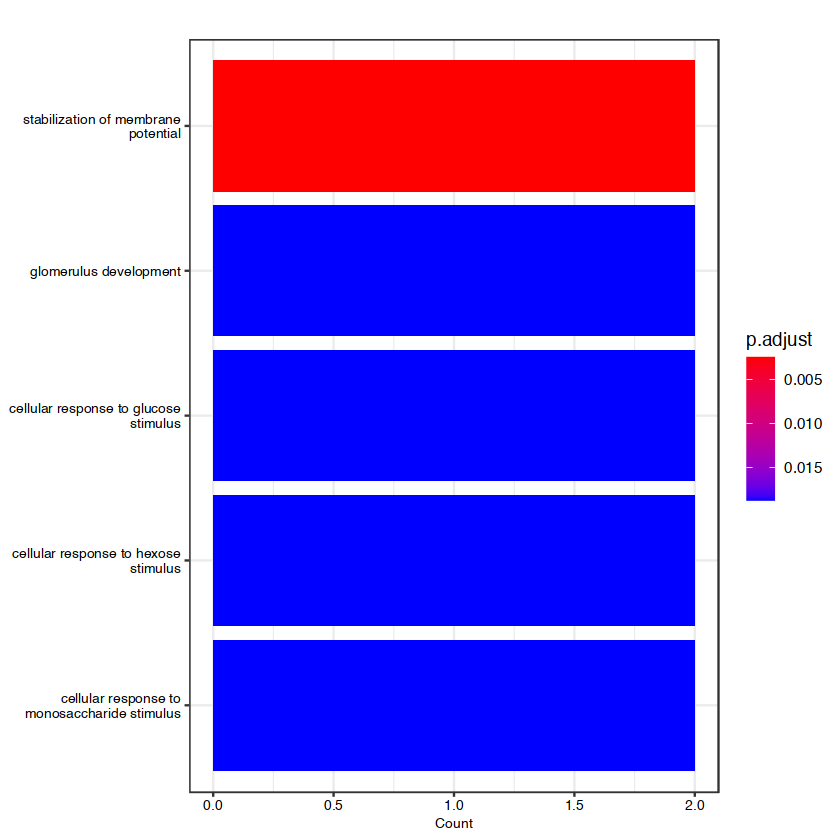

In [31]:
fit <- plot(barplot(GO_results, showCategory = 5, font.size=8))
png("data/TF/P5vsP1_DEG_Foxl2_BP.png", res = 600, width = 2400, height = 1800)
print(fit)
dev.off()

In [32]:
#BP MF CC
GO_results <- enrichGO(gene = TF.hits.down$gene, 
                       OrgDb = "org.Mm.eg.db", keyType = "SYMBOL", ont = "BP")
as.data.frame(GO_results)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0010563,GO:0010563,negative regulation of phosphorus metabolic process,5/17,453/28943,4.867574e-06,0.002187975,0.0009863242,Tgfb2/Fbln1/Cdkn1c/Sfrp1/Slit2,5
GO:0045936,GO:0045936,negative regulation of phosphate metabolic process,5/17,453/28943,4.867574e-06,0.002187975,0.0009863242,Tgfb2/Fbln1/Cdkn1c/Sfrp1/Slit2,5
GO:0007411,GO:0007411,axon guidance,4/17,259/28943,1.360536e-05,0.003104462,0.0013994705,Alcam/Tgfb2/Ncam1/Slit2,4
GO:0097485,GO:0097485,neuron projection guidance,4/17,260/28943,1.381296e-05,0.003104462,0.0013994705,Alcam/Tgfb2/Ncam1/Slit2,4
GO:0001822,GO:0001822,kidney development,4/17,334/28943,3.681459e-05,0.004837483,0.0021807049,Tgfb2/Cdkn1c/Sfrp1/Slit2,4
GO:0001933,GO:0001933,negative regulation of protein phosphorylation,4/17,346/28943,4.224052e-05,0.004837483,0.0021807049,Fbln1/Cdkn1c/Sfrp1/Slit2,4
GO:0072001,GO:0072001,renal system development,4/17,348/28943,4.319880e-05,0.004837483,0.0021807049,Tgfb2/Cdkn1c/Sfrp1/Slit2,4
GO:0003184,GO:0003184,pulmonary valve morphogenesis,2/17,17/28943,4.393238e-05,0.004837483,0.0021807049,Tgfb2/Slit2,2
GO:0071514,GO:0071514,genomic imprinting,2/17,19/28943,5.520034e-05,0.004837483,0.0021807049,Meg3/Cdkn1c,2


pdf 
  2

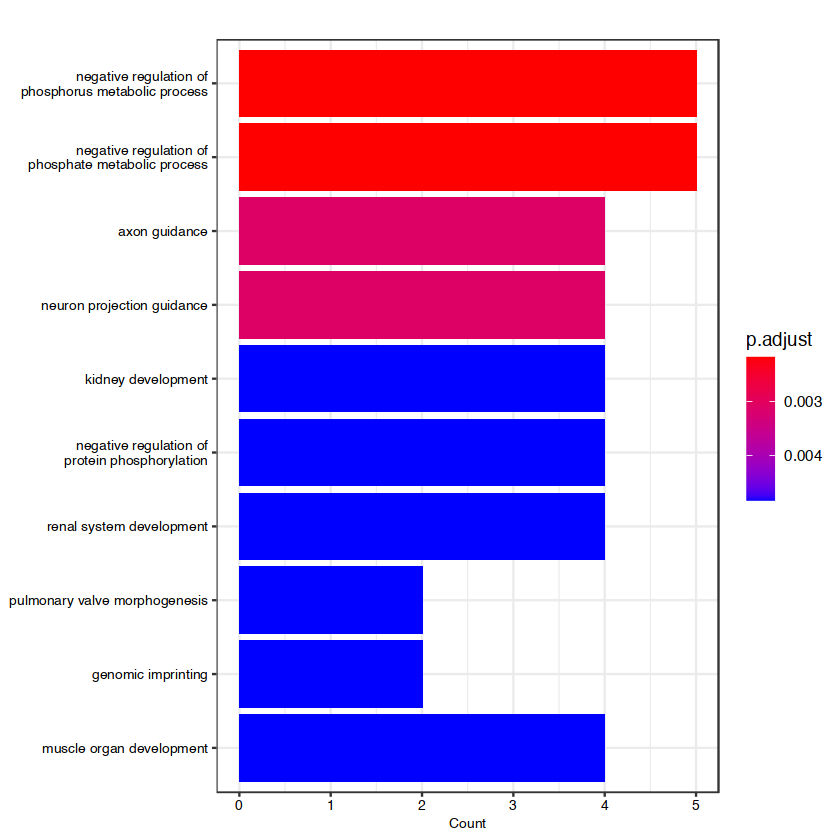

In [33]:
fit <- plot(barplot(GO_results, showCategory = 10, font.size=8))
png("data/TF/P5vsP1_DEG_Foxl2_down_BP.png", res = 600, width = 2400, height = 1800)
print(fit)
dev.off()

In [34]:
head(TF.hits.down, n=10)
dim(TF.hits.down)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,dir,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Cox7a2l,2.765188e-133,-0.2808167,0.875,0.967,6.788260e-129,P5,down,Cox7a2l
Meg3,9.836509e-132,-0.3025115,0.975,0.996,2.414765e-127,P5,down,Meg3
Hba-a1,5.901884e-116,-0.2715348,0.918,0.980,1.448853e-111,P5,down,Hba-a1
Alcam,2.960251e-96,-0.4142805,0.225,0.548,7.267120e-92,P5,down,Alcam
Npc2,1.909844e-92,-0.2555322,0.757,0.918,4.688476e-88,P5,down,Npc2
Pdgfrl,9.736947e-76,-0.3418937,0.315,0.610,2.390323e-71,P5,down,Pdgfrl
Eln,1.065743e-69,-0.3535311,0.521,0.735,2.616293e-65,P5,down,Eln
Zfp787,5.784741e-68,-0.2604527,0.152,0.409,1.420096e-63,P5,down,Zfp787
Tgfb2,6.976342e-66,-0.2923383,0.323,0.602,1.712622e-61,P5,down,Tgfb2


[1] 17  8